In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

# visulization library
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


pd.set_option('display.max_columns', None)

In [2]:
# load dataset 
df = pd.read_csv('loan-bank.csv')
# menampilkan informasi dataset
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
529,LP002716,Male,No,0,Not Graduate,No,6783,0.0,130.0,360.0,1.0,Semiurban,Y
347,LP002131,Male,Yes,2,Not Graduate,No,3083,2168.0,126.0,360.0,1.0,Urban,Y
340,LP002115,Male,Yes,3+,Not Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural,N
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
572,LP002855,Male,Yes,2,Graduate,No,16666,0.0,275.0,360.0,1.0,Urban,Y
208,LP001699,Male,No,0,Graduate,No,2479,0.0,59.0,360.0,1.0,Urban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
152,LP001531,Male,No,0,Graduate,No,9166,0.0,244.0,360.0,1.0,Urban,N
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y


In [3]:
print(df.shape)

(614, 13)


Terdapat 614 Baris dan 13 Kolom

In [4]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Beberapa Kolom yang mengalami Missing Feature adalah :


In [7]:
df.duplicated().sum()

0

In [8]:
# Duplicated data
df[df.duplicated() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [9]:
def check_outlier(df,column) :
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    
    list_outlier=df[column].apply(lambda x:'outlier' if x<lower_limit or x>upper_limit else 'not-outlier')

    
    return list_outlier

In [10]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [14]:
# cek_data(df)

# Data understand

In [11]:
num_col = list(df._get_numeric_data().columns)
print(num_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [12]:
cat_col = [i for i in df.columns if i not in num_col]
print(cat_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [13]:
numericals = num_col

categoricals = cat_col

In [14]:
df[numericals].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [15]:
df[numericals].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Observasi :

1. Semua kolom numerikal, min dan max terlihat masuk akal, Credit_History tidak akan di explore karena hanya bernilai 0 dan 1
2. Kolom LoanAmount dan  Loan_Amount_Term agak simetris (Mean dan Median hampir sama), lainnya tidak simetris
3. Rata2 LoanAmount : 146.000, LoanAmount Min : 9.000 dan LoanAmount Max : 700.000  (dalam ribuan)
4. Rata2 ApplicantIncome : 5.403,  ApplicantIncome min : 150 dan  ApplicantIncome : 81.000
5. Rata2 A co-applicant : 1.621, co-applicant min : 0 dan co-applicant Max : 41.667 
6. Rata Loan_Amount_Term 342 Bulan, Loan_Amount_Term Min : 12 Bulan, Loan_Amount_Term Max : 480 Bulan


In [17]:
df[df[categoricals].Loan_Status=='N']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


In [18]:
df[df[categoricals].Loan_Status=='Y']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [19]:
df[categoricals].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [20]:
df[categoricals].describe().T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


Observations:
Dalam DataSet ini, menginformasikan:
* mayoritas gender yang sering muncul adalah male sebanyak 489
* mayoritas **Married** dalam datashet ini adalah **YES** sebanyak 398
* mayoritas **Dependents** dalam datashet ini adalah **0** sebanyak 345
* mayoritas **Education** dalam datashet ini adalah **Graduate** sebanyak 480
* Mayoritas **Self_Employed** yang  sering muncul  **No**
* Mayoritas **Property_Area** yang sering muncu adalah **Semi Urban**
* Mayoritas **Loan_Status** yang sering muncul adalah **Y**
* **Loan_ID sehingga tidak perlu melakukan analisa lebih lanjut/dalam**

In [24]:
# cek nilai unique semua kolom
for col in df.columns : 
    print (f"======================================")
    print (f"Kolom : {col}")
    print (f'{df[col].unique()}')
    print (f'Jumlah Unique Value :{df[col].nunique()}')
    print (f"======================================")

Kolom : Loan_ID
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' '

# Box Plot Detect Outlier

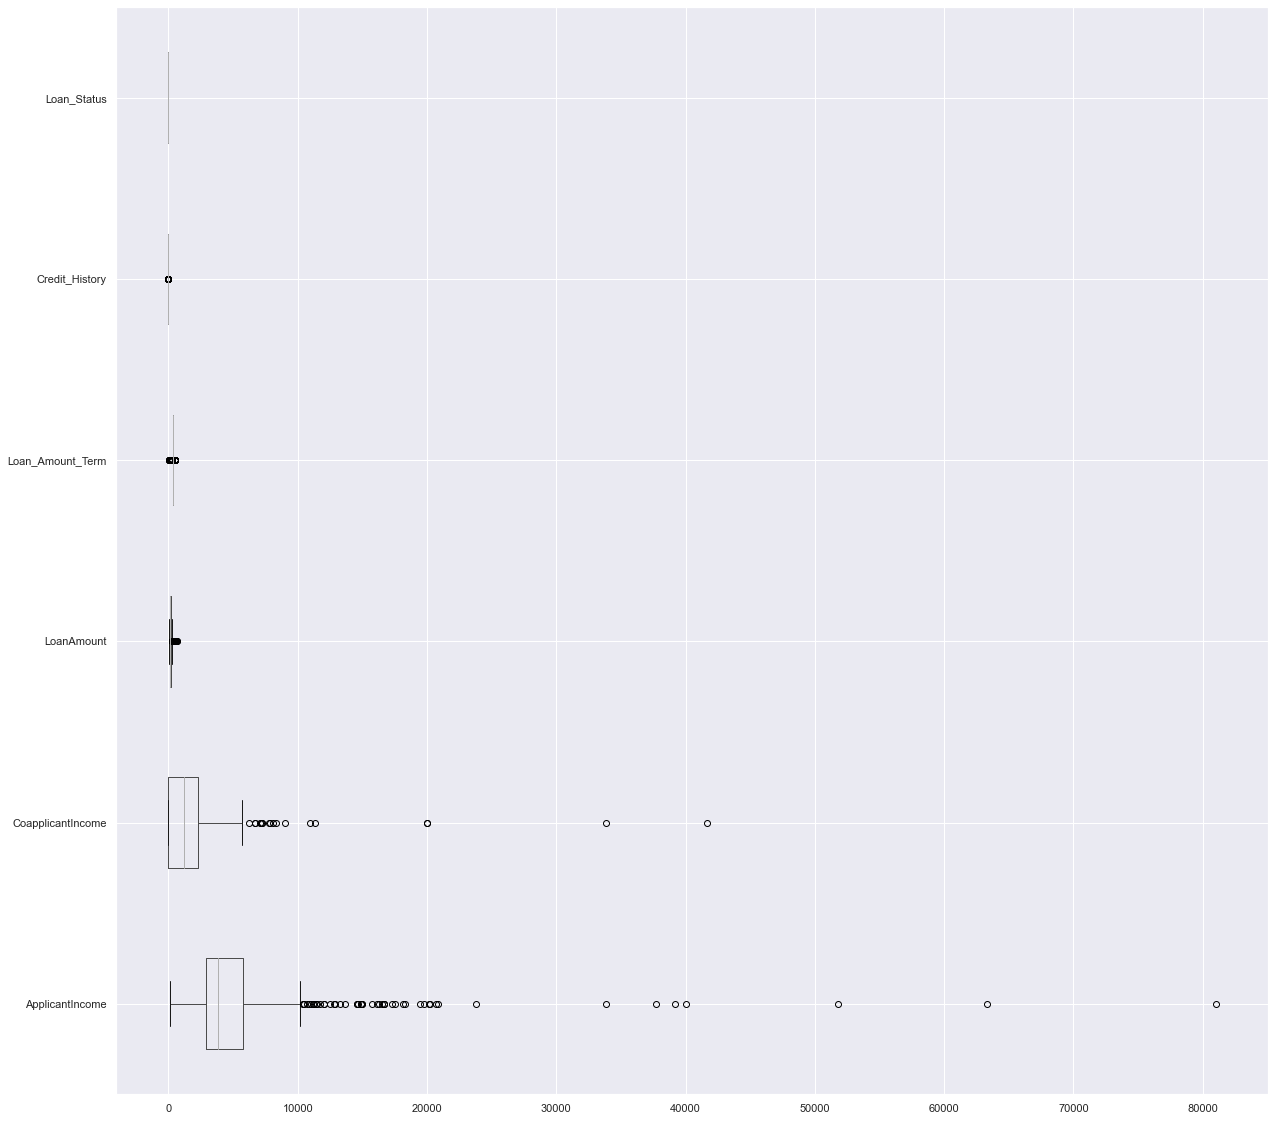

In [230]:


plt.figure(figsize=(20, 20))

df.boxplot(vert=False)
plt.subplots_adjust(left=0.1)
plt.show()

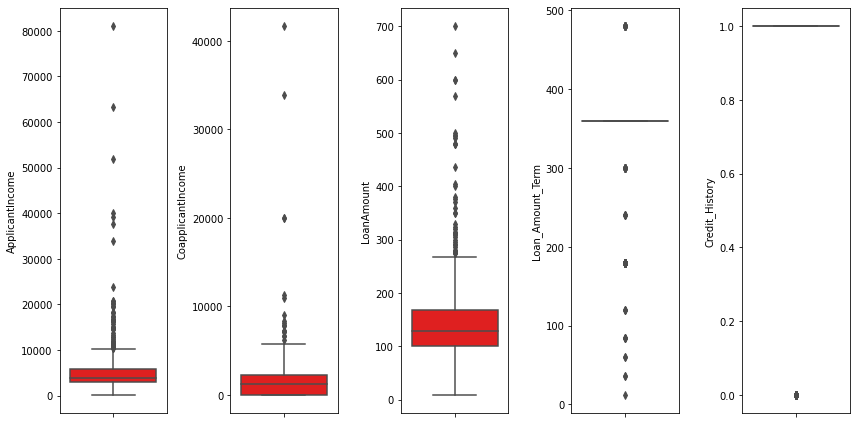

In [25]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

In [26]:
df_outlier = df.copy()

In [27]:
df_outlier['Outlier_ApplicantIncome'] = check_outlier(df_outlier,'ApplicantIncome')
df_outlier[df_outlier['Outlier_ApplicantIncome']=='outlier']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Outlier_ApplicantIncome
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,outlier
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,outlier
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N,outlier
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y,outlier
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y,outlier
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y,outlier
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y,outlier
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y,outlier
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,outlier
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N,outlier


In [28]:
df[numericals]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [29]:
df_outlier['Outlier_Loan'] = check_outlier(df,'LoanAmount')
df_outlier[df_outlier['Outlier_Loan']=='outlier']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Outlier_ApplicantIncome,Outlier_Loan
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,outlier,outlier
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y,not-outlier,outlier
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,outlier,outlier
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N,outlier,outlier
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y,outlier,outlier
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,outlier,outlier
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y,outlier,outlier
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N,not-outlier,outlier
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,outlier,outlier
161,LP001562,Male,Yes,0,Graduate,No,7933,0.0,275.0,360.0,1.0,Urban,N,not-outlier,outlier


In [30]:
df_outlier['Outlier_CoapplicantIncome'] = check_outlier(df,'CoapplicantIncome')
df_outlier[df_outlier['Outlier_CoapplicantIncome']=='outlier']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Outlier_ApplicantIncome,Outlier_Loan,Outlier_CoapplicantIncome
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,outlier,outlier,outlier
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y,not-outlier,not-outlier,outlier
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y,not-outlier,not-outlier,outlier
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y,not-outlier,not-outlier,outlier
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N,not-outlier,outlier,outlier
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,not-outlier,outlier,outlier
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N,not-outlier,not-outlier,outlier
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y,not-outlier,outlier,outlier
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y,not-outlier,not-outlier,outlier
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y,not-outlier,outlier,outlier


In [31]:
df_outlier['Outlier_LoanAmount'] = check_outlier(df_outlier,'LoanAmount')
df_outlier[df_outlier['Outlier_LoanAmount']=='outlier']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Outlier_ApplicantIncome,Outlier_Loan,Outlier_CoapplicantIncome,Outlier_LoanAmount
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,outlier,outlier,outlier,outlier
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y,not-outlier,outlier,not-outlier,outlier
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,outlier,outlier,not-outlier,outlier
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N,outlier,outlier,not-outlier,outlier
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y,outlier,outlier,not-outlier,outlier
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,outlier,outlier,not-outlier,outlier
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y,outlier,outlier,not-outlier,outlier
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N,not-outlier,outlier,outlier,outlier
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,outlier,outlier,not-outlier,outlier
161,LP001562,Male,Yes,0,Graduate,No,7933,0.0,275.0,360.0,1.0,Urban,N,not-outlier,outlier,not-outlier,outlier


In [32]:
df_outlier['Outlier_Loan_Amount_Term'] = check_outlier(df_outlier,'Loan_Amount_Term')
df_outlier[df_outlier['Outlier_Loan_Amount_Term']=='outlier']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Outlier_ApplicantIncome,Outlier_Loan,Outlier_CoapplicantIncome,Outlier_LoanAmount,Outlier_Loan_Amount_Term
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y,not-outlier,not-outlier,not-outlier,not-outlier,outlier
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y,not-outlier,not-outlier,not-outlier,not-outlier,outlier
62,LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N,not-outlier,not-outlier,not-outlier,not-outlier,outlier
66,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N,not-outlier,not-outlier,not-outlier,not-outlier,outlier
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y,not-outlier,not-outlier,not-outlier,not-outlier,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N,not-outlier,not-outlier,not-outlier,not-outlier,outlier
593,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y,not-outlier,not-outlier,not-outlier,not-outlier,outlier
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N,not-outlier,outlier,outlier,outlier,outlier
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N,not-outlier,not-outlier,not-outlier,not-outlier,outlier


In [33]:
df_outlier['Outlier_Credit_History'] = check_outlier(df_outlier,'Credit_History')
df_outlier[df_outlier['Outlier_Credit_History']=='outlier']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Outlier_ApplicantIncome,Outlier_Loan,Outlier_CoapplicantIncome,Outlier_LoanAmount,Outlier_Loan_Amount_Term,Outlier_Credit_History
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,not-outlier,not-outlier,not-outlier,not-outlier,not-outlier,outlier
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N,not-outlier,not-outlier,not-outlier,not-outlier,not-outlier,outlier
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N,not-outlier,not-outlier,not-outlier,not-outlier,not-outlier,outlier
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N,not-outlier,not-outlier,not-outlier,not-outlier,not-outlier,outlier
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N,not-outlier,not-outlier,not-outlier,not-outlier,not-outlier,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N,not-outlier,not-outlier,not-outlier,not-outlier,not-outlier,outlier
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N,not-outlier,not-outlier,not-outlier,not-outlier,not-outlier,outlier
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N,not-outlier,not-outlier,not-outlier,not-outlier,not-outlier,outlier
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N,not-outlier,not-outlier,not-outlier,not-outlier,not-outlier,outlier


## KDE plot for knowing the distribution form

C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

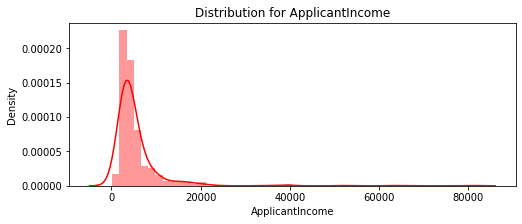

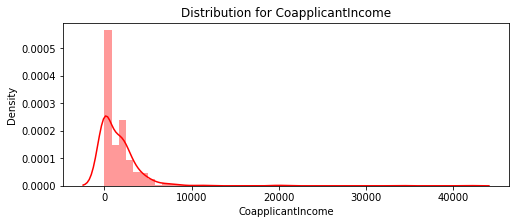

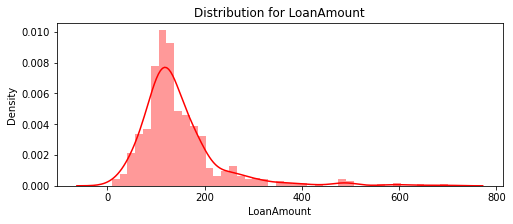

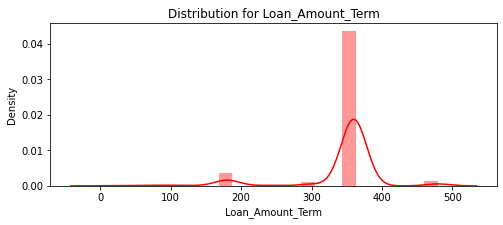

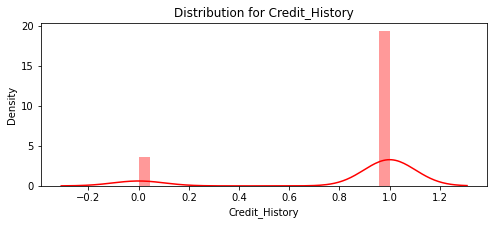

In [34]:
for feat in num_col: distplot(feat, df)

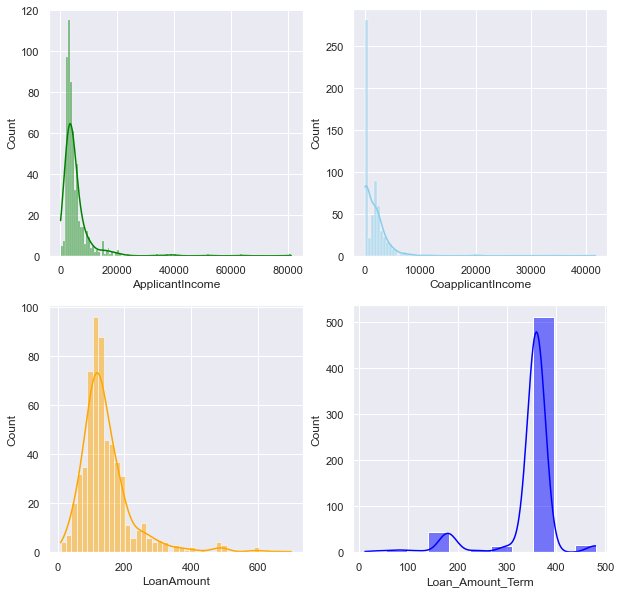

In [35]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='blue');

Observation:

*Sebagian besar customer ini mempunyai karakteristik :*
1. Customer mempunyai ApplcantIncome ~ < 10000
2. Customer mempunyai CoApplcantIncome ~  10000 
3. CUstomber meminjam LoanAmount ~ 100
4. Customer lebih banyak pengembalian uang dengan periode ~350  


# Bivariate Analysis

## Male VS Female

In [36]:
df['Gender'].value_counts(dropna=False) # dropna=False tampilkan nilai NaN

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [37]:
jumlahPria = len(df[df['Gender'] == 'Male'])
jumlahWanita = len(df[df['Gender'] == 'Female'])
nilaiNull = len(df[df['Gender'].isnull()])

print("% Male applicant: {:.2f}%".format((jumlahPria / (len(df['Gender']))*100)))
print("% Female applicant: {:.2f}%".format((jumlahWanita / (len(df['Gender']))*100)))
print("% Missing values: {:.2f}%".format((nilaiNull / (len(df['Gender']))*100)))

% Male applicant: 79.64%
% Female applicant: 18.24%
% Missing values: 2.12%


<AxesSubplot:xlabel='Gender', ylabel='count'>

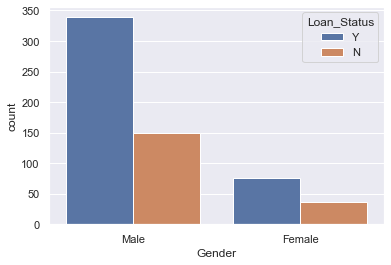

In [38]:
sns.countplot(data=df,
            hue='Loan_Status',
            x='Gender')

Berdasarkan data diatas, Mayoritas "Male Aplicant" lebih banyak disetujui

## Married VS Not Married

In [39]:
df['Married'].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [40]:
jumlahMenikah = len(df[df['Married'] == 'Yes'])
jumlahTdkMenikah = len(df[df['Married'] == 'No'])
nilaiNull = len(df[df['Married'].isnull()])

print("% Married: {:.2f}%".format((jumlahMenikah / (len(df['Married']))*100)))
print("% Not Married: {:.2f}%".format((jumlahTdkMenikah / (len(df['Married']))*100)))
print("% Missing values: {:.2f}%".format((nilaiNull / (len(df['Married']))*100)))

% Married: 64.82%
% Not Married: 34.69%
% Missing values: 0.49%


<AxesSubplot:xlabel='Married', ylabel='count'>

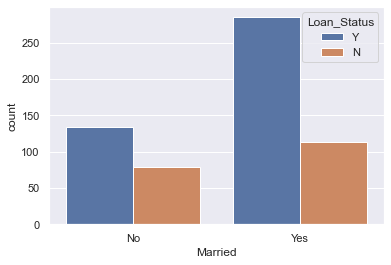

In [41]:
sns.countplot(data=df,
            hue='Loan_Status',
            x='Married')

Berdasarkan data diatas, Mayoritas "Married" lebih banyak daripada disetujui 

## Dependent

In [42]:
df['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [43]:
tanggungan0 = len(df[df['Dependents'] == '0'])
tanggungan1 = len(df[df['Dependents'] == '1'])
tanggungan1 = len(df[df['Dependents'] == '2'])
tanggungan3 = len(df[df['Dependents'] == '3+'])
nilaiNull = len(df[df['Dependents'].isnull()])

print("% Dependent 0: {:.2f}%".format((tanggungan0 / (len(df['Dependents']))*100)))
print("% Dependent 1: {:.2f}%".format((tanggungan1 / (len(df['Dependents']))*100)))
print("% Dependent 2: {:.2f}%".format((tanggungan1 / (len(df['Dependents']))*100)))
print("% Dependent 3+: {:.2f}%".format((tanggungan3 / (len(df['Dependents']))*100)))
print("% Missing values: {:.2f}%".format((nilaiNull / (len(df['Dependents']))*100)))

% Dependent 0: 56.19%
% Dependent 1: 16.45%
% Dependent 2: 16.45%
% Dependent 3+: 8.31%
% Missing values: 2.44%


<AxesSubplot:xlabel='Dependents', ylabel='count'>

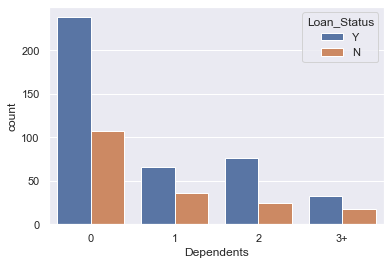

In [44]:
sns.countplot(data=df,
            hue='Loan_Status',
            x='Dependents')

Berdasarkan data diatas, Mayoritas Tidak Mempunyai Dependents / 0 lebih sering disetujui untuk Loan 

## Education

In [45]:
df['Education'].value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [46]:
jumlahLulus = len(df[df['Education'] == 'Graduate'])
jumlahTdkLulus = len(df[df['Education'] == 'Not Graduate'])
nilaiNull = len(df[df['Education'].isnull()])

print("% Graduate: {:.2f}%".format((jumlahLulus / (len(df['Education']))*100)))
print("% Not Graduate: {:.2f}%".format((jumlahTdkLulus / (len(df['Education']))*100)))
print("% Missing values: {:.2f}%".format((nilaiNull / (len(df['Education']))*100)))

% Graduate: 78.18%
% Not Graduate: 21.82%
% Missing values: 0.00%


<AxesSubplot:xlabel='Education', ylabel='count'>

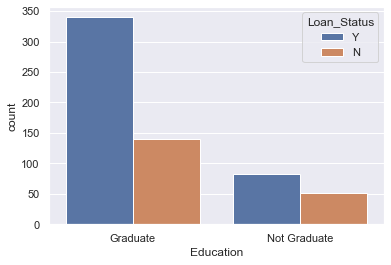

In [47]:
sns.countplot(data=df,
            hue='Loan_Status',
            x='Education')

Berdasarkan data diatas, Mayoritas Education bersatus Graduate lebih sering disetujui untuk Loan 

## Self Employed Vs Employed

In [48]:
df['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [49]:
jumlahSelf = len(df[df['Self_Employed'] == 'Yes'])
jumlahNotSelf = len(df[df['Self_Employed'] == 'No'])
nilaiNull = len(df[df['Self_Employed'].isnull()])

print("% Graduate: {:.2f}%".format((jumlahSelf / (len(df['Self_Employed']))*100)))
print("% Not Graduate: {:.2f}%".format((jumlahNotSelf / (len(df['Self_Employed']))*100)))
print("% Missing values: {:.2f}%".format((nilaiNull / (len(df['Self_Employed']))*100)))

% Graduate: 13.36%
% Not Graduate: 81.43%
% Missing values: 5.21%


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

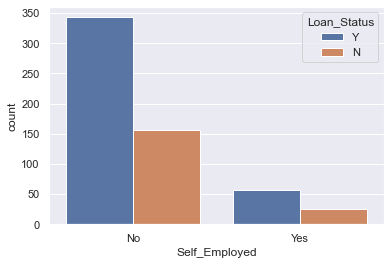

In [50]:
sns.countplot(data=df,
            hue='Loan_Status',
            x='Self_Employed')

Berdasarkan data di Atas, Mayoritas Self_employed bersattus "No" lebih sering disetujui untuk Loan 

## Property Area

In [51]:
df['Property_Area'].value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [52]:
jumlahSemiUrban = len(df[df['Property_Area'] == 'Semiurban'])
jumlahUrban = len(df[df['Property_Area'] == 'Urban'])
jumlahRural = len(df[df['Property_Area'] == 'Rural'])
nilaiNull = len(df[df['Property_Area'].isnull()])

print("% Semi Urban: {:.2f}%".format((jumlahSemiUrban / (len(df['Property_Area']))*100)))
print("% jumlah Urban: {:.2f}%".format((jumlahUrban / (len(df['Property_Area']))*100)))
print("% jumlah Rural: {:.2f}%".format((jumlahRural / (len(df['Property_Area']))*100)))
print("% Missing values: {:.2f}%".format((nilaiNull / (len(df['Property_Area']))*100)))

% Semi Urban: 37.95%
% jumlah Urban: 32.90%
% jumlah Rural: 29.15%
% Missing values: 0.00%


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

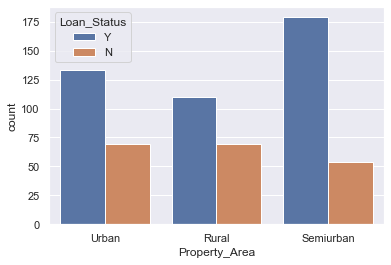

In [53]:
sns.countplot(data=df,
            hue='Loan_Status',
            x='Property_Area')

Berdasarkan data Property_Area di Atas, Mayoritas Aplicant lebih banyak  memilih Semi Urban dibandingkan yang lain 

## Credit History

In [54]:
df['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [55]:
jumlah1= len(df[df['Credit_History'] == '1'])
jumlah0 = len(df[df['Credit_History'] == '0'])
nilaiNull = len(df[df['Credit_History'].isnull()])

print("% Good Credit: {:.2f}%".format((jumlah1 / (len(df['Credit_History']))*100)))
print("% Bad Credit: {:.2f}%".format((jumlah0 / (len(df['Credit_History']))*100)))
print("% Missing values: {:.2f}%".format((nilaiNull / (len(df['Credit_History']))*100)))

% Good Credit: 0.00%
% Bad Credit: 0.00%
% Missing values: 8.14%


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

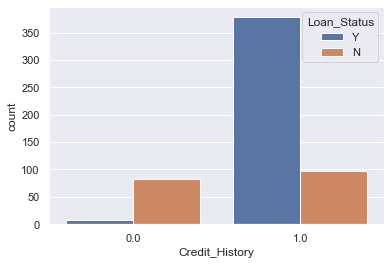

In [56]:
sns.countplot(data=df,
            hue='Loan_Status',
            x='Credit_History')

Berdasarkan data di Atas, Mayoritas Credit History bersattus "1"/ Good lebih sering disetujui untuk Loan 

## Loan Status

In [57]:
df['Loan_Status'].value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [58]:
jumlah1= len(df[df['Loan_Status'] == '1'])
jumlah0 = len(df[df['Loan_Status'] == '0'])
nilaiNull = len(df[df['Loan_Status'].isnull()])

print("% Loan Yes: {:.2f}%".format((jumlah1 / (len(df['Loan_Status']))*100)))
print("% Loan No: {:.2f}%".format((jumlah0 / (len(df['Loan_Status']))*100)))
print("% Missing values: {:.2f}%".format((nilaiNull / (len(df['Loan_Status']))*100)))

% Loan Yes: 0.00%
% Loan No: 0.00%
% Missing values: 0.00%


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

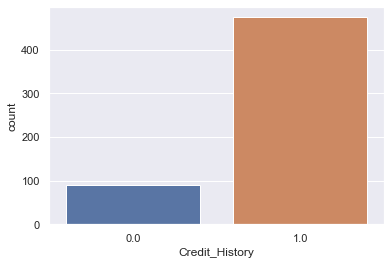

In [59]:
sns.countplot(data=df,
            x='Credit_History')

Berdasarkan data di Atas, Mayoritas Loan bersattus "1"/ disetujui dibandingkan dengan loan status 0 / tidak disetujui 

# HeatMap

In [60]:
# fig,axes = plt.subplots(4,2,figsize=(12,15))
# for idx,cat_col in enumerate(cat_col):
#     row,col = idx//2,idx%2
#     sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])

In [61]:
dummy = pd.DataFrame()
### Create Dictionary
Loan_Status = {
    'Y':1,
    'N':0
}

In [62]:
df['Loan_Status'] = df['Loan_Status'].map(Loan_Status)

<AxesSubplot:>

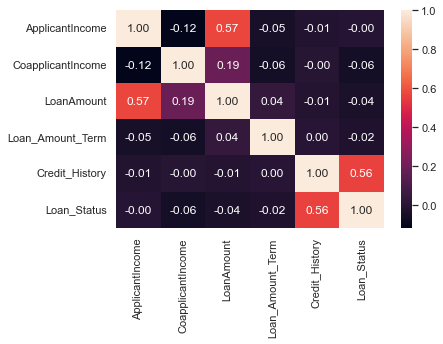

In [63]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Korelasi Kuat antara :

1. Loan Amount dengan Applicant Income,
2. Loan Status dengan Credit History

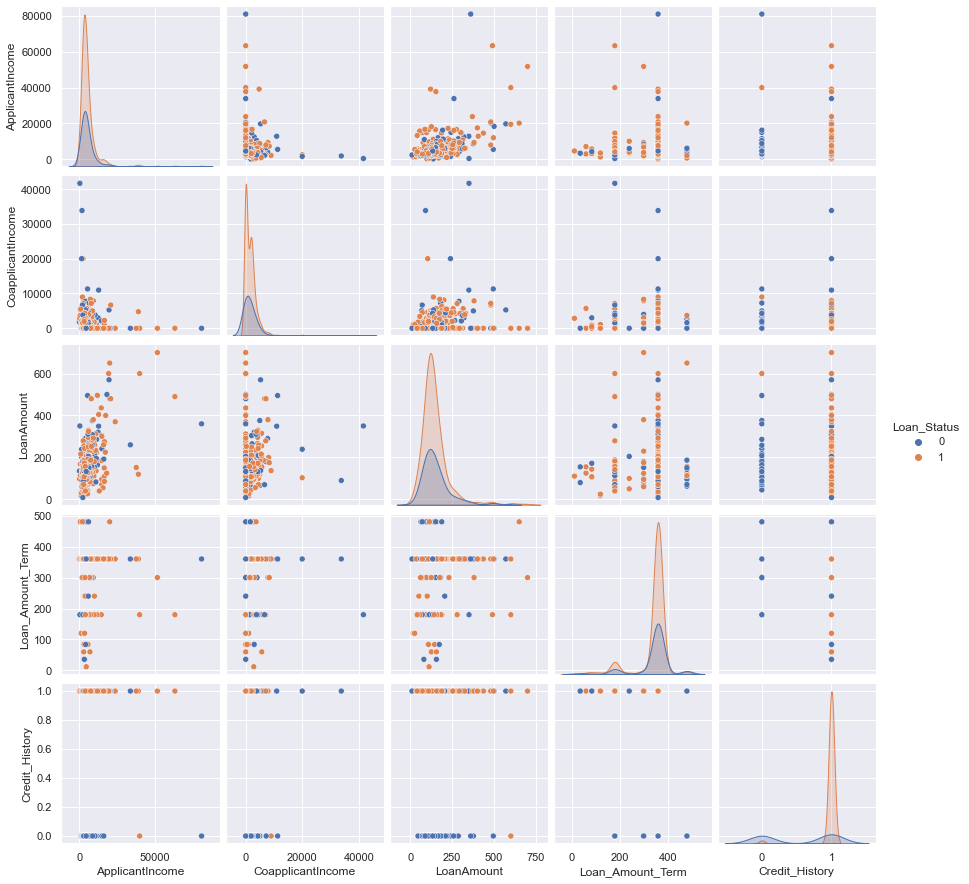

In [66]:
sns.pairplot(df, hue='Loan_Status')

Oberservations :

Semakin tinggi ApplicantIncome maka Semakin Besar juga LoanAmount yang disetujui

# Data Preprocessing

## Data Cleansing

In [64]:
df_update = df.copy()

In [65]:
df_update

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [67]:
categoricals

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [68]:
df_update

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [69]:
# isi Gender 
df_update['Gender'].fillna(df_update['Gender'].mode()[0], inplace = True) # Mode

# isi Married
df_update['Married'].fillna(df_update['Married'].mode()[0], inplace = True)

# Isi Dependents
df_update['Married'].fillna(df_update['Married'].mode()[0], inplace = True)

# Isi Self_Employed
df_update['Self_Employed'].fillna(df_update['Self_Employed'].mode()[0], inplace = True)

# Isi Data LoanAmount

df_update['LoanAmount'].fillna(df_update['LoanAmount'].median(), inplace = True)
df_update['Loan_Amount_Term'].fillna(df_update['Loan_Amount_Term'].median(), inplace = True)

# Isi Data
df_update['Loan_Amount_Term'].fillna(df_update['Loan_Amount_Term'].median(), inplace = True)

# Isi Dependents
df_update['Dependents'].fillna(df_update['Dependents'].mode()[0],inplace=True)

# Isi Credit_History
df_update['Credit_History'].fillna(df_update['Credit_History'].mode()[0],inplace=True)

In [70]:
df_update.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [71]:
df_update.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [72]:
df_update

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [73]:
# print("Correlation Matrix")
# plt.rcParams['figure.figsize']=(12,8)
# sns.heatmap(df_update.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True)

# Check Outlier

Asumsi if 𝑥<1.5 𝐼𝑄𝑅 or 𝑥>1.5 𝐼𝑄𝑅 Itu Outliers.

In [74]:
df_update_temp = df_update.copy()

In [75]:
print(f"Jumlah baris sebelum memfilter outlier:")
print(len(df_update_temp))

for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
  Q1 = df_update_temp[col].quantile(0.25)
  Q3 = df_update_temp[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df_update_temp = df_update_temp[(df_update_temp[col] >= low_limit) & (df_update_temp[col] <= high_limit)]

  baris_drop = len(df_update_temp)
#   baris_drop_persen = {:.2f}%".format((baris_drop / len(df_update)) *100 
    
print(f"Jumlah baris setelah memfilter outlier:")
print(f"{baris_drop} atau sekitar { (baris_drop / len(df_update)) *100   } %")

Jumlah baris sebelum memfilter outlier:
614
Jumlah baris setelah memfilter outlier:
445 atau sekitar 72.47557003257329 %


Karena Baris drop yang dihapus sekitar 30%, maka dalam hal ini mini portopolio ini saya asumsikan normal dan tidak menghapus outlier, karena jika dihapus banyak sekali informasi yang hilang, karena dataset dalam baris ini sedikit

# Business Insight

## Bagaimana Sebaran Male dan Female

<AxesSubplot:xlabel='Gender', ylabel='count'>

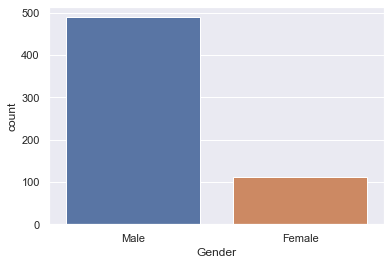

In [242]:
sns.countplot(data=df,
            x='Gender')

## Bagaimana Sebaran antara ApplicantIncome dengan Loan Amount

In [247]:
fig = px.scatter(df_update, x='ApplicantIncome', y='LoanAmount')
fig.update_layout(title='Applicant Income Vs Loan Amount ',
                  xaxis_title="Applicant Income",
                  
                  yaxis_title="Loan_Amount",
                  title_x=0.5)
fig.show()

## Bagaimana Sebaran antara LoanAmount dengan Loan Term

In [251]:
fig = px.scatter(df_update, x='LoanAmount', y='Loan_Amount_Term')
fig.update_layout(title='Applicant Income Vs Loan Amount ',
                  xaxis_title="Loan_Amount",
                  yaxis_title="Loan",
                  title_x=0.5)
fig.show()

## Bagaimana sebaran property Area antara pria dan wanita 

In [76]:
df_update.groupby(["Property_Area","Gender"])["Loan_ID"].count().reset_index()

,Property_Area,Gender,Loan_ID
0,Rural,Female,24
1,Rural,Male,155
2,Semiurban,Female,55
3,Semiurban,Male,178
4,Urban,Female,33
5,Urban,Male,169


In [77]:
df_PropertyRural=df[df["Property_Area"]=="Rural"]

C:\Users\Eky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



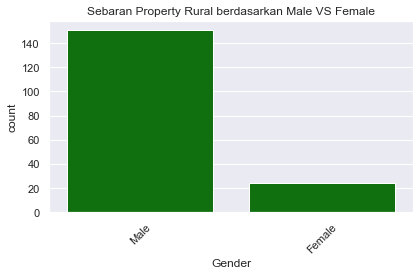

In [91]:
sns.countplot(df_PropertyRural["Gender"], color="green")
plt.xticks(rotation=45)
plt.title('Sebaran Property Rural berdasarkan Male VS Female')
plt.tight_layout()

In [79]:
df_PropertySemiurban=df[df["Property_Area"]=="Semiurban"]

C:\Users\Eky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


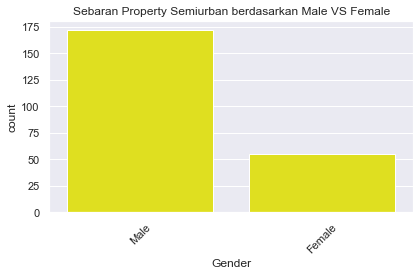

In [86]:
sns.countplot(df_PropertySemiurban["Gender"], color="yellow")
plt.xticks(rotation=45)
plt.title('Sebaran Property Semiurban berdasarkan Male VS Female')
plt.tight_layout()

In [88]:
df_PropertyUrban=df[df["Property_Area"]=="Urban"]

C:\Users\Eky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



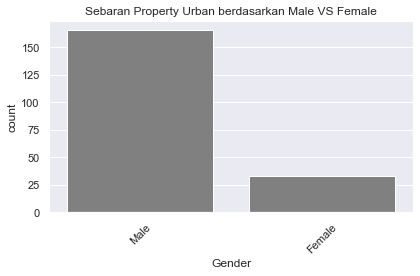

In [90]:
sns.countplot(df_PropertyUrban["Gender"], color="grey")
plt.xticks(rotation=45)
plt.title('Sebaran Property Urban berdasarkan Male VS Female')
plt.tight_layout()

Bisnis lainnya :

# Modelling

Karena Machine Learning hanya bisa membaca kolom Numerik, maka ubah semua kolom kategorikal menjadi numerik

## Buat Encoding

In [93]:
df_update_ml= df_update.copy()

In [94]:
df_update_ml = df_update_ml.drop(['Loan_ID'], axis = 1) # drop feature Loan_ID

In [95]:
df_update_ml

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


### Convert Categorical menjadi Numeric

In [96]:
### Onehot Encoding
onehot_columns = [ 'Property_Area']
df_update_ml = pd.get_dummies(df_update_ml, columns = onehot_columns)

In [97]:
### Encoding Married
yes_no_dict = {
    'Yes':1,
    'No':0
}

for colname in ['Married', 'Self_Employed']:
    df_update_ml[colname] = df_update_ml[colname].map(yes_no_dict)

In [98]:
# For Loan_Status
df_update_ml['Loan_Status'] = df_update_ml['Loan_Status'].replace({"Y" : 1, "N" : 0})

# For Gender
df_update_ml['Gender'] = df_update_ml['Gender'].replace({"Male" : 1, "Female" : 0})

# For Education
df_update_ml['Education'] = df_update_ml['Education'].replace({"Graduate" : 1, "Not Graduate" : 0})

In [99]:
# df_update_ml

In [100]:
from sklearn.preprocessing import LabelEncoder
# feature_col = ['Property_Area','Education', 'Dependents']
feature_col = ['Dependents']
le = LabelEncoder()
for col in feature_col:
    df_update_ml[col] = le.fit_transform(df_update_ml[col])

In [101]:
df_update_ml

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1,0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,0,0,1


In [102]:
df_update_ml[df_update_ml['Dependents']==3].reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,7,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,0,0,1,0
1,34,1,0,3,1,0,12500,3000.0,320.0,360.0,1.0,0,1,0,0
2,61,1,1,3,1,0,3029,0.0,99.0,360.0,1.0,1,0,0,1
3,68,1,1,3,0,1,7100,0.0,125.0,60.0,1.0,1,0,0,1
4,73,1,1,3,0,0,4755,0.0,95.0,360.0,0.0,0,0,1,0
5,74,1,1,3,1,1,5266,1774.0,187.0,360.0,1.0,1,0,1,0
6,78,1,1,3,1,0,3167,4000.0,180.0,300.0,0.0,0,0,1,0
7,79,1,1,3,0,1,3333,2166.0,130.0,360.0,1.0,1,0,1,0
8,109,1,1,3,0,0,2071,754.0,94.0,480.0,1.0,1,0,1,0
9,126,1,1,3,1,0,23803,0.0,370.0,360.0,1.0,1,1,0,0


In [103]:
df_update_ml.dtypes

Gender                       int64
Married                      int64
Dependents                   int32
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [104]:
df_update_ml['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Terlihat bahwa data kita imbalanced pada kolom target variablenya. sehingga perlu undersampling

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
df_train, df_test = train_test_split(df_update_ml, 
                                     test_size = 0.25, random_state = 1) 

In [110]:
x_train_data = df_train.loc[:, df_update_ml.columns!='Loan_Status']
y_train_data = df_train.loc[:, df_update_ml.columns=='Loan_Status']

x_test_data = df_test.loc[:, df_update_ml.columns!='Loan_Status']
y_test_data = df_test.loc[:, df_update_ml.columns=='Loan_Status']

In [111]:
print("x_train shape", x_train_data.shape)
print("x_train shape", y_train_data.shape)

print("================")


print("x_test shape", x_test_data.shape)
print("y_test shape", y_test_data.shape)


x_train shape (460, 13)
x_train shape (460, 1)
x_test shape (154, 13)
y_test shape (154, 1)


Sample data train dan test sudah sama

In [106]:
pd.set_option('display.max_columns', None)

In [113]:
x_train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
74,1,1,3,1,1,5266,1774.0,187.0,360.0,1.0,0,1,0
385,1,0,1,1,0,3667,0.0,113.0,180.0,1.0,0,0,1
504,1,1,0,0,0,3814,1483.0,124.0,300.0,1.0,0,1,0
61,1,1,3,1,0,3029,0.0,99.0,360.0,1.0,0,0,1
159,1,1,0,1,0,4583,5625.0,255.0,360.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,1,0,1,0,6080,2569.0,182.0,360.0,1.0,1,0,0
144,1,1,2,1,0,11757,0.0,187.0,180.0,1.0,0,0,1
72,1,0,0,1,0,3500,0.0,81.0,300.0,1.0,0,1,0
235,1,1,1,1,0,5500,1260.0,170.0,360.0,1.0,1,0,0


In [114]:
y_train_data

,Loan_Status
74,1
385,1
504,1
61,1
159,1
...,...
129,0
144,1
72,1
235,1


In [115]:
x_test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,1,0,1,1,0,11250,0.0,196.0,360.0,1.0,0,1,0
544,0,1,0,0,0,3017,663.0,102.0,360.0,1.0,0,1,0
41,1,0,0,1,0,1800,1213.0,47.0,360.0,1.0,0,0,1
148,0,0,0,1,0,10000,1666.0,225.0,360.0,1.0,1,0,0
111,0,1,0,1,0,2929,2333.0,139.0,360.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,6782,0.0,128.0,360.0,1.0,0,0,1
241,1,1,1,0,0,2510,1983.0,140.0,180.0,1.0,0,0,1
308,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,1,0,0
289,1,0,0,1,0,9508,0.0,187.0,360.0,1.0,1,0,0


In [116]:
y_test_data

,Loan_Status
533,0
544,1
41,1
148,0
111,1
...,...
95,0
241,0
308,0
289,1


In [117]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Model akan melihat data 1 lebih banyak daripada data 0, menyebabkan inbalance data

### Dealing With Imbalanced Data

In [118]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['Loan_Status']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under['Loan_Status']))

Counter({1: 317, 0: 143})
Counter({0: 143, 1: 143})


### Evaluation Function

In [119]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

### K-Nearest Neighbor

In [120]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_under, y_train_under)

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [121]:
evaluate(knn)

Accuracy: 0.512987012987013
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.29      0.37      0.32        49
           1       0.66      0.58      0.62       105

    accuracy                           0.51       154
   macro avg       0.48      0.47      0.47       154
weighted avg       0.54      0.51      0.53       154

------
Assuming 1 as positive, we get:

True Positive: 61
True Negative: 18
False Positive: 31
False Negative: 44

Precision: 0.6630434782608695
Recall: 0.580952380952381
F1-Score: 0.6192893401015228


***K Nearest Neighbor***

1. True Positive: 61
2. True Negative: 18
3. False Positive: 31
4. False Negative: 44
-----------------------------

1. Accuracy: 51,52%
2. Precision: 66,30%
3. Recall: 58,09 %
4. F1-Score: 61,92 %

karena kita ingin meminimalisir menolak orang tidak mampu bayar, maka minimalisir FN, sehingga mencari recall yang tinggi

In [140]:
def evaluate_recall(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    return recall

In [123]:
recall_dict = {
    'n':[],
    'recall':[]
}
for n in [3,5,7,9,11,13,15,17,19,21,23]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_under, y_train_under)
    recall = evaluate_recall(knn)
    recall_dict['n'].append(n)
    recall_dict['recall'].append(recall)
    
recall_df = pd.DataFrame(recall_dict)

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Eky\anaconda3\lib\site-packages

In [131]:
recall_df.sort_values(['recall'], ascending = False)

,n,recall
1,5,0.561905
0,3,0.542857
4,11,0.542857
2,7,0.523810
5,13,0.514286
7,17,0.514286
8,19,0.514286
3,9,0.504762
10,23,0.495238
6,15,0.485714


Best Recall n = 5

### Tuning K-Nearest Neighbors for F1-Score

In [141]:
def evaluate_f1(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return f1_score

In [133]:
f1_dict = {
    'n':[],
    'f1-score':[]
}

for n in [3,5,7,9,11,13,15,17,19,21,23]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_under, y_train_under)
    f1 = evaluate_f1(knn)
    f1_dict['n'].append(n)
    f1_dict['f1-score'].append(f1)
    
f1_df = pd.DataFrame(f1_dict)

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Eky\anaconda3\lib\site-packages

In [142]:
f1_df.sort_values('f1-score', ascending = False)

,n,f1-score
0,3,0.670000
3,9,0.656566
6,15,0.656566
7,17,0.649746
4,11,0.638743
9,21,0.635897
2,7,0.629442
8,19,0.626263
1,5,0.619289
5,13,0.617801


In [143]:
x_test_data.iloc[0]

Gender                         1.0
Married                        0.0
Dependents                     1.0
Education                      1.0
Self_Employed                  0.0
ApplicantIncome            11250.0
CoapplicantIncome              0.0
LoanAmount                   196.0
Loan_Amount_Term             360.0
Credit_History                 1.0
Property_Area_Rural            0.0
Property_Area_Semiurban        1.0
Property_Area_Urban            0.0
Name: 533, dtype: float64

In [144]:
model_final_knn = KNeighborsClassifier(n_neighbors = 5)
model_final_knn.fit(x_train_under, y_train_under)

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [145]:
pd.DataFrame(x_test_data.iloc[0:10,:])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,1,0,1,1,0,11250,0.0,196.0,360.0,1.0,0,1,0
544,0,1,0,0,0,3017,663.0,102.0,360.0,1.0,0,1,0
41,1,0,0,1,0,1800,1213.0,47.0,360.0,1.0,0,0,1
148,0,0,0,1,0,10000,1666.0,225.0,360.0,1.0,1,0,0
111,0,1,0,1,0,2929,2333.0,139.0,360.0,1.0,0,1,0
293,0,0,0,1,0,5417,0.0,143.0,480.0,0.0,0,0,1
435,0,1,0,1,0,10047,0.0,128.0,240.0,1.0,0,1,0
407,0,0,0,0,0,2213,0.0,66.0,360.0,1.0,1,0,0
311,1,0,0,0,0,2927,2405.0,111.0,360.0,1.0,0,1,0
23,1,1,2,0,0,3365,1917.0,112.0,360.0,0.0,1,0,0


In [146]:
model_final_knn.predict(pd.DataFrame(x_test_data.iloc[0:10,:]))

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [147]:
y_test_data.head(10)

,Loan_Status
533,0
544,1
41,1
148,0
111,1
293,0
435,1
407,1
311,1
23,0


### Logistic Regression

In [149]:
logreg = LogisticRegression()
logreg.fit(x_train_under, y_train_under)

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Eky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [150]:
evaluate(logreg)

Accuracy: 0.6948051948051948
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.52      0.55      0.53        49
           1       0.78      0.76      0.77       105

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.70      0.69      0.70       154

------
Assuming 1 as positive, we get:

True Positive: 80
True Negative: 27
False Positive: 22
False Negative: 25

Precision: 0.7843137254901961
Recall: 0.7619047619047619
F1-Score: 0.7729468599033817


***Logistic Regresion***

1. True Positive: 80
2. True Negative: 27
3. False Positive: 22
4. False Negative: 25
-----------------------------
1. Accuracy: 69,48 %
2. Precision: 78,43%
3. Recall: 76,19 %
4. F1-Score: 77,29 %

In [151]:
data_untuk_diprediksi = pd.DataFrame(x_test_data.iloc[0:10,:])
data_untuk_diprediksi

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,1,0,1,1,0,11250,0.0,196.0,360.0,1.0,0,1,0
544,0,1,0,0,0,3017,663.0,102.0,360.0,1.0,0,1,0
41,1,0,0,1,0,1800,1213.0,47.0,360.0,1.0,0,0,1
148,0,0,0,1,0,10000,1666.0,225.0,360.0,1.0,1,0,0
111,0,1,0,1,0,2929,2333.0,139.0,360.0,1.0,0,1,0
293,0,0,0,1,0,5417,0.0,143.0,480.0,0.0,0,0,1
435,0,1,0,1,0,10047,0.0,128.0,240.0,1.0,0,1,0
407,0,0,0,0,0,2213,0.0,66.0,360.0,1.0,1,0,0
311,1,0,0,0,0,2927,2405.0,111.0,360.0,1.0,0,1,0
23,1,1,2,0,0,3365,1917.0,112.0,360.0,0.0,1,0,0


In [152]:
logreg.predict(data_untuk_diprediksi)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [153]:
y_test_data.head(10)

,Loan_Status
533,0
544,1
41,1
148,0
111,1
293,0
435,1
407,1
311,1
23,0


### Decision Tree

In [154]:
dt = DecisionTreeClassifier()
dt.fit(x_train_under, y_train_under)
evaluate(dt)

Accuracy: 0.6168831168831169
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.42      0.57      0.49        49
           1       0.76      0.64      0.69       105

    accuracy                           0.62       154
   macro avg       0.59      0.60      0.59       154
weighted avg       0.65      0.62      0.63       154

------
Assuming 1 as positive, we get:

True Positive: 67
True Negative: 28
False Positive: 21
False Negative: 38

Precision: 0.7613636363636364
Recall: 0.638095238095238
F1-Score: 0.694300518134715


***Decision Tree***

1. True Positive: 67
2. True Negative: 28
3. False Positive: 21
4. False Negative: 38
-----------------------------
1. Accuracy: 61,68 %
2. Precision: 76,13%
3. Recall: 63,80 %
4. F1-Score: 69,44 %

In [155]:
data_untuk_diprediksi = pd.DataFrame(x_test_data.iloc[0:10,:])
data_untuk_diprediksi

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,1,0,1,1,0,11250,0.0,196.0,360.0,1.0,0,1,0
544,0,1,0,0,0,3017,663.0,102.0,360.0,1.0,0,1,0
41,1,0,0,1,0,1800,1213.0,47.0,360.0,1.0,0,0,1
148,0,0,0,1,0,10000,1666.0,225.0,360.0,1.0,1,0,0
111,0,1,0,1,0,2929,2333.0,139.0,360.0,1.0,0,1,0
293,0,0,0,1,0,5417,0.0,143.0,480.0,0.0,0,0,1
435,0,1,0,1,0,10047,0.0,128.0,240.0,1.0,0,1,0
407,0,0,0,0,0,2213,0.0,66.0,360.0,1.0,1,0,0
311,1,0,0,0,0,2927,2405.0,111.0,360.0,1.0,0,1,0
23,1,1,2,0,0,3365,1917.0,112.0,360.0,0.0,1,0,0


In [156]:
dt.predict(data_untuk_diprediksi)

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [157]:
y_test_data.head(10)

,Loan_Status
533,0
544,1
41,1
148,0
111,1
293,0
435,1
407,1
311,1
23,0


### Random Forest

Lakukan kembali Train Data 

In [194]:
from sklearn.ensemble import RandomForestClassifier # karena clasififier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [196]:
df_train, df_test = train_test_split(df_update_ml, 
                                     test_size = 0.25, random_state = 1)


In [197]:
x_train_data = df_train.loc[:, df_update_ml.columns!='Loan_Status']
y_train_data = df_train.loc[:, df_update_ml.columns=='Loan_Status']

x_test_data = df_test.loc[:, df_update_ml.columns!='Loan_Status']
y_test_data = df_test.loc[:, df_update_ml.columns=='Loan_Status']


In [198]:

print("x_train shape", x_train_data.shape)
print("x_train shape", y_train_data.shape)

print("================")


print("x_test shape", x_test_data.shape)
print("y_test shape", y_test_data.shape)


x_train shape (460, 13)
x_train shape (460, 1)
x_test shape (154, 13)
y_test shape (154, 1)


In [200]:
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
# base_model = DecisionTreeClassifier bisa ganti dengan desision, lebih cepat cuma gk terllau bagus
base_model.fit(x_train_data, y_train_data)
evaluate(base_model)

Accuracy: 0.7532467532467533
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.69      0.41      0.51        49
           1       0.77      0.91      0.83       105

    accuracy                           0.75       154
   macro avg       0.73      0.66      0.67       154
weighted avg       0.74      0.75      0.73       154

------
Assuming 1 as positive, we get:

True Positive: 96
True Negative: 20
False Positive: 29
False Negative: 9

Precision: 0.768
Recall: 0.9142857142857143
F1-Score: 0.8347826086956521


***Base Model Random Forest***

1. True Positive: 96
2. True Negative: 20
3. False Positive: 29
4. False Negative: 9
-----------------------------
1. Accuracy: 75,32 %
2. Precision: 76,8%
3. Recall: 91,42 %
4. F1-Score: 83,47 %

In [210]:
data_untuk_diprediksi = pd.DataFrame(x_test_data.iloc[0:10,:])
data_untuk_diprediksi

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,1,0,1,1,0,11250,0.0,196.0,360.0,1.0,0,1,0
544,0,1,0,0,0,3017,663.0,102.0,360.0,1.0,0,1,0
41,1,0,0,1,0,1800,1213.0,47.0,360.0,1.0,0,0,1
148,0,0,0,1,0,10000,1666.0,225.0,360.0,1.0,1,0,0
111,0,1,0,1,0,2929,2333.0,139.0,360.0,1.0,0,1,0
293,0,0,0,1,0,5417,0.0,143.0,480.0,0.0,0,0,1
435,0,1,0,1,0,10047,0.0,128.0,240.0,1.0,0,1,0
407,0,0,0,0,0,2213,0.0,66.0,360.0,1.0,1,0,0
311,1,0,0,0,0,2927,2405.0,111.0,360.0,1.0,0,1,0
23,1,1,2,0,0,3365,1917.0,112.0,360.0,0.0,1,0,0


In [211]:
base_model.predict(data_untuk_diprediksi)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [212]:
y_test_data.head(10)

,Loan_Status
533,0
544,1
41,1
148,0
111,1
293,0
435,1
407,1
311,1
23,0


### Undersampling 

In [201]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print("Sebelum di undersample: ", Counter(y_train_data['Loan_Status']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train_data, 
                                                        y_train_data)

# summarize class distribution
print("Setelah di undersample: ",Counter(y_train_under['Loan_Status']))

Sebelum di undersample:  Counter({1: 317, 0: 143})
Setelah di undersample:  Counter({0: 143, 1: 143})


In [202]:
under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model.fit(x_train_under, y_train_under)
evaluate(under_model, x_test_data, y_test_data)

Accuracy: 0.7077922077922078
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.54      0.55      0.55        49
           1       0.79      0.78      0.78       105

    accuracy                           0.71       154
   macro avg       0.66      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

------
Assuming 1 as positive, we get:

True Positive: 82
True Negative: 27
False Positive: 22
False Negative: 23

Precision: 0.7884615384615384
Recall: 0.780952380952381
F1-Score: 0.7846889952153111


***Undersampling Model Random Forest***

1. True Positive: 82
2. True Negative: 27
3. False Positive: 22
4. False Negative: 23
-----------------------------
1. Accuracy: 70,77 %
2. Precision: 78,84 %
3. Recall: 78,09 %
4. F1-Score: 78,46 %

In [213]:
data_untuk_diprediksi = pd.DataFrame(x_test_data.iloc[0:10,:])
data_untuk_diprediksi

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,1,0,1,1,0,11250,0.0,196.0,360.0,1.0,0,1,0
544,0,1,0,0,0,3017,663.0,102.0,360.0,1.0,0,1,0
41,1,0,0,1,0,1800,1213.0,47.0,360.0,1.0,0,0,1
148,0,0,0,1,0,10000,1666.0,225.0,360.0,1.0,1,0,0
111,0,1,0,1,0,2929,2333.0,139.0,360.0,1.0,0,1,0
293,0,0,0,1,0,5417,0.0,143.0,480.0,0.0,0,0,1
435,0,1,0,1,0,10047,0.0,128.0,240.0,1.0,0,1,0
407,0,0,0,0,0,2213,0.0,66.0,360.0,1.0,1,0,0
311,1,0,0,0,0,2927,2405.0,111.0,360.0,1.0,0,1,0
23,1,1,2,0,0,3365,1917.0,112.0,360.0,0.0,1,0,0


In [214]:
under_model.predict(data_untuk_diprediksi)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [215]:
y_test_data.head(10)

,Loan_Status
533,0
544,1
41,1
148,0
111,1
293,0
435,1
407,1
311,1
23,0


### Oversampling

In [203]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print("Sebelum di Oversampling",Counter(y_train_data['Loan_Status']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_data, y_train_data)

# summarize class distribution
print("Setelah di Oversampling",Counter(y_train_SMOTE['Loan_Status']))

Sebelum di Oversampling Counter({1: 317, 0: 143})
Setelah di Oversampling Counter({1: 317, 0: 317})


In [204]:
over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, x_test_data, y_test_data)

Accuracy: 0.7467532467532467
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.64      0.47      0.54        49
           1       0.78      0.88      0.83       105

    accuracy                           0.75       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.73      0.75      0.73       154

------
Assuming 1 as positive, we get:

True Positive: 92
True Negative: 23
False Positive: 26
False Negative: 13

Precision: 0.7796610169491526
Recall: 0.8761904761904762
F1-Score: 0.8251121076233184


***Oversampling Model Random Forest***

1. True Positive: 92
2. True Negative: 23
3. False Positive: 26
4. False Negative: 13
-----------------------------
1. Accuracy: 74,67 %
2. Precision: 77,96 %
3. Recall: 87,61 %
4. F1-Score: 82,51 %

In [216]:
data_untuk_diprediksi = pd.DataFrame(x_test_data.iloc[0:10,:])
data_untuk_diprediksi

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,1,0,1,1,0,11250,0.0,196.0,360.0,1.0,0,1,0
544,0,1,0,0,0,3017,663.0,102.0,360.0,1.0,0,1,0
41,1,0,0,1,0,1800,1213.0,47.0,360.0,1.0,0,0,1
148,0,0,0,1,0,10000,1666.0,225.0,360.0,1.0,1,0,0
111,0,1,0,1,0,2929,2333.0,139.0,360.0,1.0,0,1,0
293,0,0,0,1,0,5417,0.0,143.0,480.0,0.0,0,0,1
435,0,1,0,1,0,10047,0.0,128.0,240.0,1.0,0,1,0
407,0,0,0,0,0,2213,0.0,66.0,360.0,1.0,1,0,0
311,1,0,0,0,0,2927,2405.0,111.0,360.0,1.0,0,1,0
23,1,1,2,0,0,3365,1917.0,112.0,360.0,0.0,1,0,0


In [217]:
over_model.predict(data_untuk_diprediksi)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [218]:
y_test_data.head(10)

,Loan_Status
533,0
544,1
41,1
148,0
111,1
293,0
435,1
407,1
311,1
23,0


### Combining Oversampling and Undersampling

In [206]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1) # end job = -1, seluruh cpu dlm mesing kita

combined_model = RandomForestClassifier( n_jobs = -1) # end job = -1, seluruh cpu dlm mesing kita
over = SMOTE(sampling_strategy=0.5) # 
under = RandomUnderSampler(sampling_strategy=0.5) # 
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps) # proses over samping, undersampling, dan masuk k model, lalu pipeline

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data) 
evaluate(pipeline, x_test_data, y_test_data)

Accuracy: 0.7662337662337663
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.72      0.43      0.54        49
           1       0.78      0.92      0.84       105

    accuracy                           0.77       154
   macro avg       0.75      0.68      0.69       154
weighted avg       0.76      0.77      0.75       154

------
Assuming 1 as positive, we get:

True Positive: 97
True Negative: 21
False Positive: 28
False Negative: 8

Precision: 0.776
Recall: 0.9238095238095239
F1-Score: 0.8434782608695652


***Combine Model Over+Under Random Forest***

1. True Positive: 97
2. True Negative: 21
3. False Positive: 28
4. False Negative: 8
-----------------------------
1. Accuracy: 76,62 %
2. Precision: 77,6 %
3. Recall: 92,38 %
4. F1-Score: 83,34 %

In [219]:
data_untuk_diprediksi = pd.DataFrame(x_test_data.iloc[0:10,:])
data_untuk_diprediksi

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,1,0,1,1,0,11250,0.0,196.0,360.0,1.0,0,1,0
544,0,1,0,0,0,3017,663.0,102.0,360.0,1.0,0,1,0
41,1,0,0,1,0,1800,1213.0,47.0,360.0,1.0,0,0,1
148,0,0,0,1,0,10000,1666.0,225.0,360.0,1.0,1,0,0
111,0,1,0,1,0,2929,2333.0,139.0,360.0,1.0,0,1,0
293,0,0,0,1,0,5417,0.0,143.0,480.0,0.0,0,0,1
435,0,1,0,1,0,10047,0.0,128.0,240.0,1.0,0,1,0
407,0,0,0,0,0,2213,0.0,66.0,360.0,1.0,1,0,0
311,1,0,0,0,0,2927,2405.0,111.0,360.0,1.0,0,1,0
23,1,1,2,0,0,3365,1917.0,112.0,360.0,0.0,1,0,0


In [220]:
combined_model.predict(data_untuk_diprediksi)

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [221]:
y_test_data.head(10)

,Loan_Status
533,0
544,1
41,1
148,0
111,1
293,0
435,1
407,1
311,1
23,0


### Finding Best Coefficient of Oversampling and Undersampling

In [207]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm # buat bar

import warnings
warnings.simplefilter(action='ignore')


oversampling_coef = [0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
undersampling_coef = [0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]



result = {
    'over_coef':[],
    'under_coef':[],
    'acc':[],
    'prec':[],
    'recall':[],
    'f1':[]
}

for over_score in tqdm(oversampling_coef):
    for under_score in undersampling_coef:
        try:
            combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
            over = SMOTE(sampling_strategy = over_score)
            under = RandomUnderSampler(sampling_strategy = under_score)
            steps = [('o', over), ('u', under), ('model', combined_model)]
            pipeline = Pipeline(steps = steps)

            pipeline.fit(x_train_data, y_train_data)
            y_pred = pipeline.predict(x_test_data)

            result['over_coef'].append(over_score)
            result['under_coef'].append(under_score)
            result['acc'].append(accuracy_score(y_test_data, y_pred))
            result['prec'].append(precision_score(y_test_data, y_pred))
            result['recall'].append(recall_score(y_test_data, y_pred))
            result['f1'].append(f1_score(y_test_data, y_pred))
        except:
            pass
        

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.52it/s]


In [208]:
df_result = pd.DataFrame(result)

In [209]:
df_result

,over_coef,under_coef,acc,prec,recall,f1
0,0.5,0.5,0.753247,0.768000,0.914286,0.834783
1,0.5,0.6,0.766234,0.780488,0.914286,0.842105
2,0.5,0.7,0.753247,0.786325,0.876190,0.828829
3,0.5,0.8,0.753247,0.796460,0.857143,0.825688
4,0.5,0.9,0.727273,0.805825,0.790476,0.798077
5,0.5,1.0,0.714286,0.801980,0.771429,0.786408
6,0.6,0.6,0.733766,0.762295,0.885714,0.819383
7,0.6,0.7,0.779221,0.803419,0.895238,0.846847
8,0.6,0.8,0.740260,0.787611,0.847619,0.816514
9,0.6,0.9,0.772727,0.796610,0.895238,0.843049


# Kesimpulan

***K Nearest Neighbor***

1. True Positive: 61
2. True Negative: 18
3. False Positive: 31
4. False Negative: 44
-----------------------------

1. Accuracy: 51,52%
2. Precision: 66,30%
3. Recall: 58,09 %
4. F1-Score: 61,92 %


=======================================================

***Logistic Regresion***

1. True Positive: 80
2. True Negative: 27
3. False Positive: 22
4. False Negative: 25
-----------------------------
1. Accuracy: 69,48 %
2. Precision: 78,43%
3. Recall: 76,19 %
4. F1-Score: 77,29 %

==============================================================

***Decision Tree***

1. True Positive: 67
2. True Negative: 28
3. False Positive: 21
4. False Negative: 38
-----------------------------
1. Accuracy: 61,68 %
2. Precision: 76,13%
3. Recall: 63,80 %
4. F1-Score: 69,44 %

=============================================================

***Base Model Random Forest***

1. True Positive: 96
2. True Negative: 20
3. False Positive: 29
4. False Negative: 9
-----------------------------
1. Accuracy: 75,32 %
2. Precision: 76,8%
3. Recall: 91,42 %
4. F1-Score: 83,47 %

=================================================================

***Undersampling Model Random Forest***

1. True Positive: 80
2. True Negative: 28
3. False Positive: 21
4. False Negative: 25
-----------------------------
1. Accuracy: 70,12 %
2. Precision: 79,20 %
3. Recall: 76,19 %
4. F1-Score: 77,69 %

==================================================================

***Oversampling Model Random Forest***

1. True Positive: 92
2. True Negative: 23
3. False Positive: 26
4. False Negative: 13
-----------------------------
1. Accuracy: 77,96 %
2. Precision: 87,61 %
3. Recall: 87,61 %
4. F1-Score: 82,51 %

===================================================================

***Combine Model Over+Under Random Forest***

1. True Positive: 97
2. True Negative: 21
3. False Positive: 28
4. False Negative: 8
-----------------------------
1. Accuracy: 76,62 %
2. Precision: 77,6 %
3. Recall: 92,38 %
4. F1-Score: 83,34 %

Model terbaik untuk Bank Loan adalah Recall ini : Combine Model Over+Under Random Forest